In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (2).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (94).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (380).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (652).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (239).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (511).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (181).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (69).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (248).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (750).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (439).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (343).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-S

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


In [3]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [4]:
import os
import glob as gb

# Specify the base directory path
base_path = '/kaggle/input/multiple-sclerosis'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, 'Multiple Sclerosis')

# Get the list of folders in the 'seg_train' directory
folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 761 in folder MS-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 1002 in folder Control-Axial


In [5]:
size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(687, 912, 4)        1
(543, 487, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
Name: count, dtype: int64

In [6]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [7]:
import cv2

In [8]:
s = 150

In [9]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [10]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


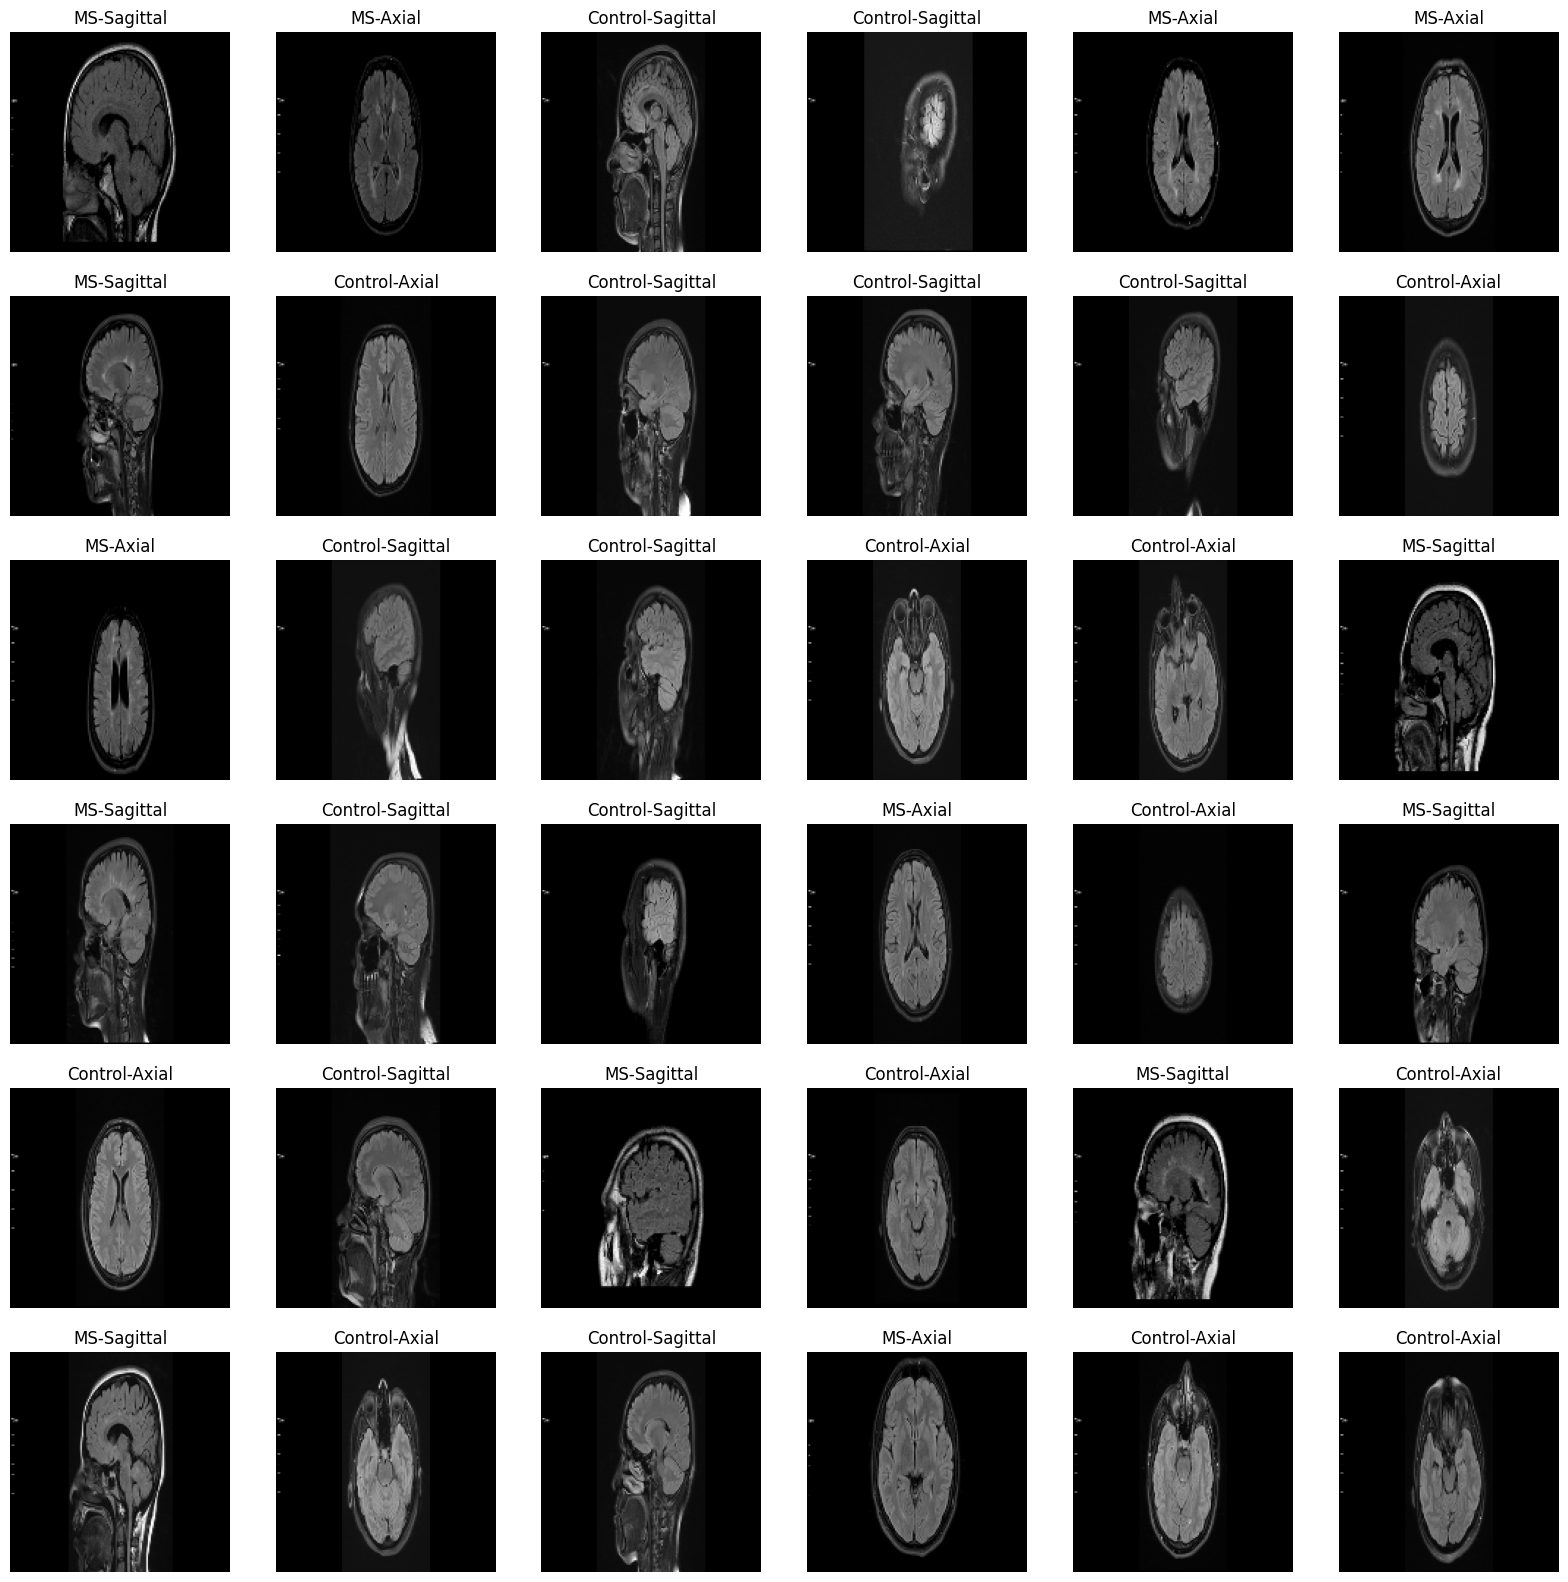

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


In [13]:
from keras.layers import MaxPooling2D,Dropout

In [17]:

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Step 2: Architecture Design
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))    # Output layer with the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])
# Step 5: Training
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
44/44 [==============================] - 38s 840ms/step - loss: -881.5682 - accuracy: 0.3010 - val_loss: -6042.3335 - val_accuracy: 0.3486
Epoch 2/30
44/44 [==============================] - 37s 830ms/step - loss: -64169.5195 - accuracy: 0.2981 - val_loss: -285748.9688 - val_accuracy: 0.3486
Epoch 3/30
44/44 [==============================] - 37s 844ms/step - loss: -1207236.8750 - accuracy: 0.2981 - val_loss: -3426038.2500 - val_accuracy: 0.3486
Epoch 4/30
44/44 [==============================] - 38s 851ms/step - loss: -8021351.5000 - accuracy: 0.2981 - val_loss: -20240240.0000 - val_accuracy: 0.3486
Epoch 5/30
44/44 [==============================] - 37s 847ms/step - loss: -37967728.0000 - accuracy: 0.2981 - val_loss: -78961808.0000 - val_accuracy: 0.3486
Epoch 6/30
44/44 [==============================] - 37s 832ms/step - loss: -130865848.0000 - accuracy: 0.2981 - val_loss: -245521456.0000 - val_accuracy: 0.3486
Epoch 7/30
44/44 [==============================] - 37s 831ms

In [18]:
# Step 6: Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print test accuracy

print("Test accuracy:", test_accuracy)

6/6 [==============================] - 1s 211ms/step - loss: -1900178964480.0000 - accuracy: 0.2727
Test accuracy: 0.27272728085517883


6/6 [==============================] - 1s 202ms/step
Precision: 0.27
Recall: 0.27
F1-Score: 0.27
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.27      1.00      0.43        48
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        46

    accuracy                           0.27       176
   macro avg       0.07      0.25      0.11       176
weighted avg       0.07      0.27      0.12       176



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


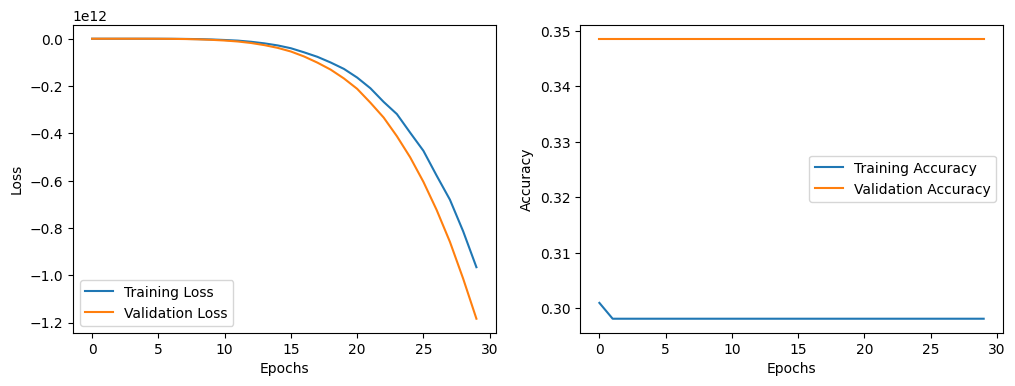

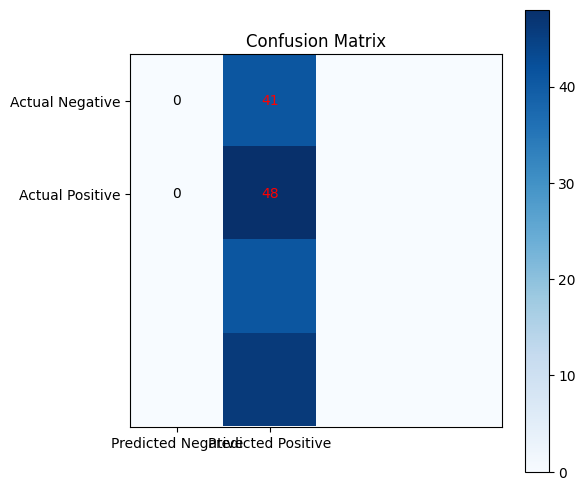

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Step 6: Evaluate the Model on the Test Set
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_binary, average='micro')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1_score))

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", classification_rep)

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], labels=['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='red' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()
